# 随机森林

In [10]:
# 导入随机森林分类器
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 解决中文字体显示问题
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 创建随机森林模型
from sklearn.tree import DecisionTreeClassifier

# 导入DecisionTreeClassifier，解决NameError
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
matplotlib.rcParams['axes.unicode_minus'] = False    # 正常显示负号


随机森林模型准确率：0.7832

决策树与随机森林比较：
决策树准确率：0.7203
随机森林准确率：0.7832
准确率提升：6.29%

随机森林特征重要性：
         特征       重要性
1       sex  0.440471
0    pclass  0.193635
5      fare  0.190201
2       age  0.083477
3     sibsp  0.039294
4     parch  0.036584
6  embarked  0.016337


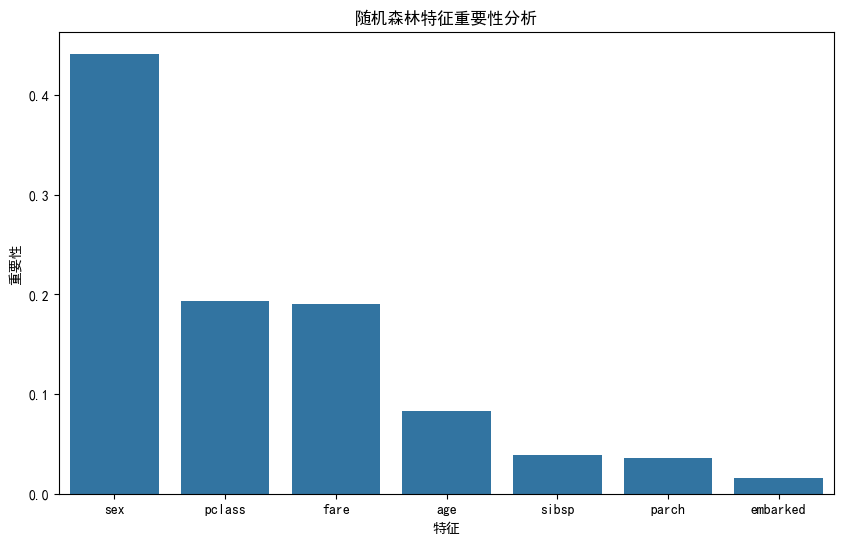

In [11]:



# 导入DecisionTreeClassifier，解决NameError
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

rf_model = RandomForestClassifier(n_estimators=500, random_state=42, bootstrap=True, max_depth=3)
"""超参数
n_estimators: 决策树的数量（相当于投票人）
random_state: 随机种子
bootstrap   : 采样后是否放回盒子
max_depth   : 决策树的最大深度
"""

# 训练模型
rf_model.fit(X_train, y_train)

# 在测试集上进行预测
rf_pred = rf_model.predict(X_test)

# 评估模型
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"\n随机森林模型准确率：{rf_accuracy:.4f}")

# 比较决策树和随机森林
# 训练决策树模型
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
# 计算决策树在测试集上的准确率
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

print("\n决策树与随机森林比较：")
print(f"决策树准确率：{dt_accuracy:.4f}")
print(f"随机森林准确率：{rf_accuracy:.4f}")
print(f"准确率提升：{(rf_accuracy-dt_accuracy)*100:.2f}%")

# 计算随机森林的特征重要性
rf_feature_importance = pd.DataFrame({
    '特征': X.columns,
    '重要性': rf_model.feature_importances_
})
rf_feature_importance = rf_feature_importance.sort_values('重要性', ascending=False)
print("\n随机森林特征重要性：")
print(rf_feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='特征', y='重要性', data=rf_feature_importance)
plt.title('随机森林特征重要性分析')
plt.show()



# 采用网格搜索确定决策树的最佳参数

Fitting 7 folds for each of 25 candidates, totalling 175 fits

最佳超参数组合: {'max_depth': 7, 'n_estimators': 1000}
最佳交叉验证得分: 0.8086
最佳随机森林模型在测试集上的准确率: 0.7832

优化前随机森林准确率: 0.7832
优化后随机森林准确率: 0.7832
准确率提升: 0.00%


C:\Users\19942\AppData\Local\Temp\ipykernel_43032\1171908445.py:56: UserWarning: Glyph 32593 (\N{CJK UNIFIED IDEOGRAPH-7F51}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\19942\AppData\Local\Temp\ipykernel_43032\1171908445.py:56: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\19942\AppData\Local\Temp\ipykernel_43032\1171908445.py:56: UserWarning: Glyph 25628 (\N{CJK UNIFIED IDEOGRAPH-641C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\19942\AppData\Local\Temp\ipykernel_43032\1171908445.py:56: UserWarning: Glyph 32034 (\N{CJK UNIFIED IDEOGRAPH-7D22}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\19942\AppData\Local\Temp\ipykernel_43032\1171908445.py:56: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\19942\AppData\Local\Temp\ipykernel_43032\1171908445.py:56: UserWarning: Glyph 26524 (\

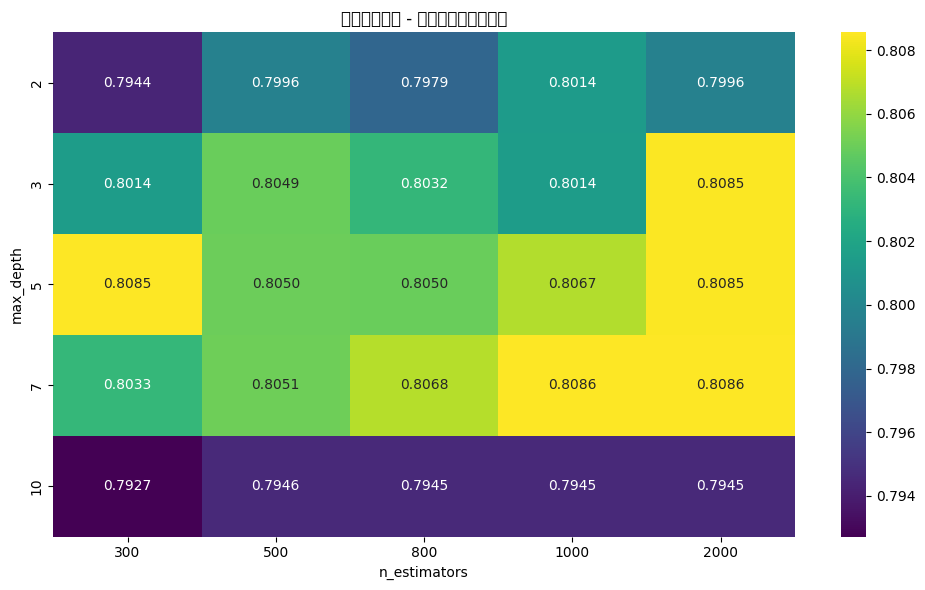

In [5]:
# 使用网格搜索为随机森林寻找最优超参数
from sklearn.model_selection import GridSearchCV

# 定义要搜索的超参数网格
param_grid = {
    'n_estimators': [ 300, 500, 800,1000,2000],
    'max_depth': [2,3, 5, 7, 10]
}

# 创建随机森林模型
rf = RandomForestClassifier(random_state=1)

# 创建网格搜索对象,verbose=1表示打印详细信息
grid_search = GridSearchCV(
    estimator=rf,               # 随机森林模型
    param_grid=param_grid,      # 超参数网格
    cv=7,                       # 交叉验证次数
    scoring='accuracy',         # 采用准确性作为网格搜索最佳参数标准
    n_jobs=-1,                  # 使用所有CPU核心
    verbose=1                   # 日志输出
)

# 在训练数据上执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print(f"\n最佳超参数组合: {grid_search.best_params_}")
print(f"最佳交叉验证得分: {grid_search.best_score_:.4f}")

# 使用最佳参数创建随机森林模型
best_rf_model = grid_search.best_estimator_

# 在测试集上评估最佳模型
best_rf_pred = best_rf_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_pred)
print(f"最佳随机森林模型在测试集上的准确率: {best_rf_accuracy:.4f}")

# 比较原始随机森林和调优后的随机森林
print(f"\n优化前随机森林准确率: {rf_accuracy:.4f}")
print(f"优化后随机森林准确率: {best_rf_accuracy:.4f}")
print(f"准确率提升: {(best_rf_accuracy-rf_accuracy)*100:.2f}%")

# 可视化网格搜索结果
results = pd.DataFrame(grid_search.cv_results_)
pivot_table = results.pivot_table(
    values='mean_test_score', 
    index='param_max_depth', 
    columns='param_n_estimators'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.4f')
plt.title('网格搜索结果 - 随机森林超参数调优')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.tight_layout()
plt.show()